# Project Description

* The iris flower dataset consists of three species, these are setosa, virginica and versicolor. These flowers are distinguishing by their sepal length, sepal width, petal length and petal width.
* Our main aim in this project is to classify iris flowers based on those above sepal and petal measurements, by creating a model using iris dataset. Which is downloaded from kaggle.

# About IRIS dataset

* The IRIS dataset is a multivariate dataset which contains the data to quantify the morphological variation of iris flower.
* This dataset is a csv file and consists of 150 records in total, 50 samples of each species of iris flower.
* It has 5 attributes, these are sepal length, petal length, sepal width, petal width(in cm.) and class(species name of iris flower).

# Project outline

* Problem statement
* Import required libraries and load the datset
* Understand the data
* EDA(exploratory data analysis)
* Data visualization
* Feature engineering
* Train-test split of the data
* Model training and model testing
* Calculating the accuracy of model by using some classification ML algorithms
* Conclusion


## Problem statement

* Iris dataset consists of three different species of iris flower like iris setosa, iris virginica and iris versicolor. These flowers are differentiated on the measures of their sepal length, sepal width, petal length and  petal width.
* The main aim of this multiclass classification project is to develop a robust and accurate machine learning model, which is capable of predict the flower class based on its morphological features.

In [1]:
# Importing libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing train test split and ML models 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from tabulate import tabulate

In [6]:
# Import evaluation metrics for model performance

In [7]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [13]:
# load the Iris csv dataset

df=pd.read_csv("C:\\Users\\chira\\OneDrive\\Desktop\\iris flower classification\\DataSET\\IRIS.csv")

In [15]:
# First 5 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# Last 5 rows
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [19]:
df.shape

(150, 5)

In [21]:
df.size

750

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
df.describe(include="all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [29]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [31]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# EDA

In [34]:
# Class counts of species 
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [36]:
# removing iris- from species names
df['species']=df['species'].str.replace("Iris-","")

In [38]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

* There is no null values

In [43]:
df.duplicated().sum()

3

In [45]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


* we dont drop duplicates here, because the data imbalance may occur.

In [48]:
# checking for outliers
df.columns[:-1]# Exclude 'species' column

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

# Checking for outliers

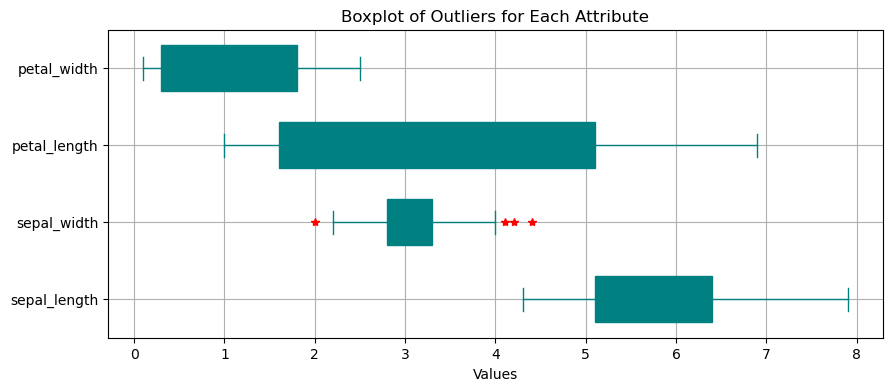

In [51]:
# Create a boxplot for each attribute excluding the target variable
input_attributes = df.columns[:-1].tolist()
plt.figure(figsize=(10, 4))
df[input_attributes].boxplot(sym='r*', vert=False, patch_artist=True, widths=0.6, color='teal')
plt.title('Boxplot of Outliers for Each Attribute')
plt.xlabel('Values')
plt.show()

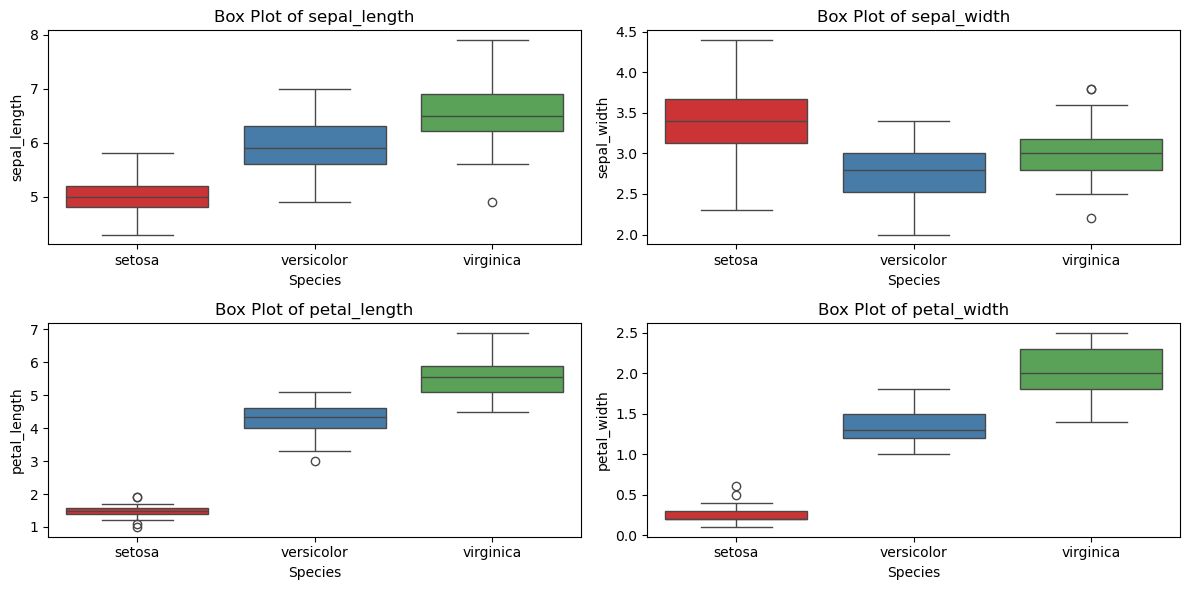

In [53]:
# Create a boxplot for all the attributes with target variable 
plt.figure(figsize=(12, 6))

attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, attribute in enumerate(attributes):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=attribute, data=df, palette='Set1')

    plt.title(f'Box Plot of {attribute}')
    plt.xlabel('Species')
    plt.ylabel(attribute)

plt.tight_layout()
plt.show()

# Outlier Treatments

In [55]:
# Replace outliers with median value 
input_attributes = df.columns[:-1].tolist()
def replace_outliers_with_median(attribute):
    median = attribute.median()
    lower_limit = attribute.quantile(0.25) - 1.5 * (attribute.quantile(0.75) - attribute.quantile(0.25))
    upper_limit = attribute.quantile(0.75) + 1.5 * (attribute.quantile(0.75) - attribute.quantile(0.25))
    
    # Replace values outside the upper and lower limits with the median
    attribute = attribute.apply(lambda x: median if x < lower_limit or x > upper_limit else x)
    return attribute

# Apply the function to each attribute in the DataFrame
for attribute in input_attributes:
    df[attribute] = replace_outliers_with_median(df[attribute])

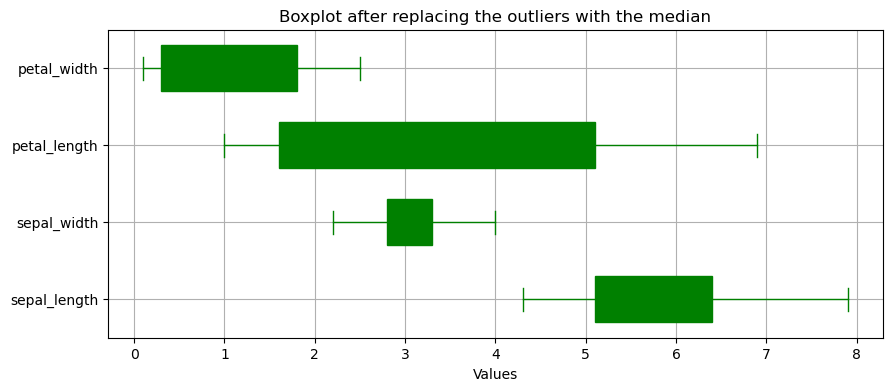

In [58]:
# Box plots to verify if outliers were removed
input_attributes = df.columns[:-1].tolist()
plt.figure(figsize=(10, 4))
df[input_attributes].boxplot(sym='r*', vert=False, patch_artist=True, widths=0.6, color='Green')
plt.title('Boxplot after replacing the outliers with the median')
plt.xlabel('Values')
plt.show()

In [60]:
#checking numerical and categorical columns
num_list = df.select_dtypes(include='number').columns.tolist()
obj_list = df.select_dtypes(include='object').columns.tolist()
print(f'\nNumerical columns in the dataframe: {num_list}')
print(f'\nObject columns in the dataframe: {obj_list}')


Numerical columns in the dataframe: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

Object columns in the dataframe: ['species']


In [62]:
# number of unique values in each column
# Displaying the total number of unique values in each column
for i in df:
    print("No. of unique values in %s column are: %s" % (i, df[i].nunique()))

No. of unique values in sepal_length column are: 35
No. of unique values in sepal_width column are: 19
No. of unique values in petal_length column are: 43
No. of unique values in petal_width column are: 22
No. of unique values in species column are: 3


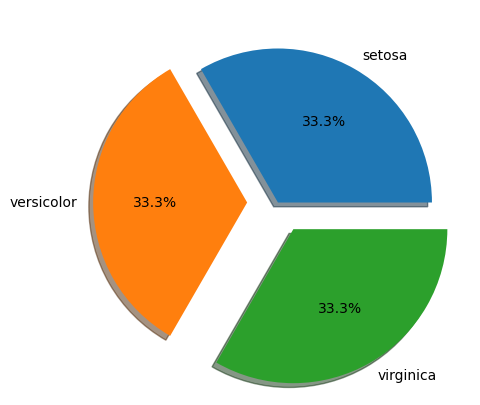

In [64]:
plt.figure(figsize=(5,5))
plt.pie(df['species'].value_counts(),autopct='%.1f%%',labels=df['species'].value_counts().index,explode=[0,0.2,0.2],shadow=True);

* The above Pie chart displays the distribution of species in the dataset. From the above pie chart, we can clearly see that, contribution of Iris-setosa is 33.3% from the total percentage of the given species data, followed by Iris-versicolor with 33.3% and Iris-virginia with 33.3%.

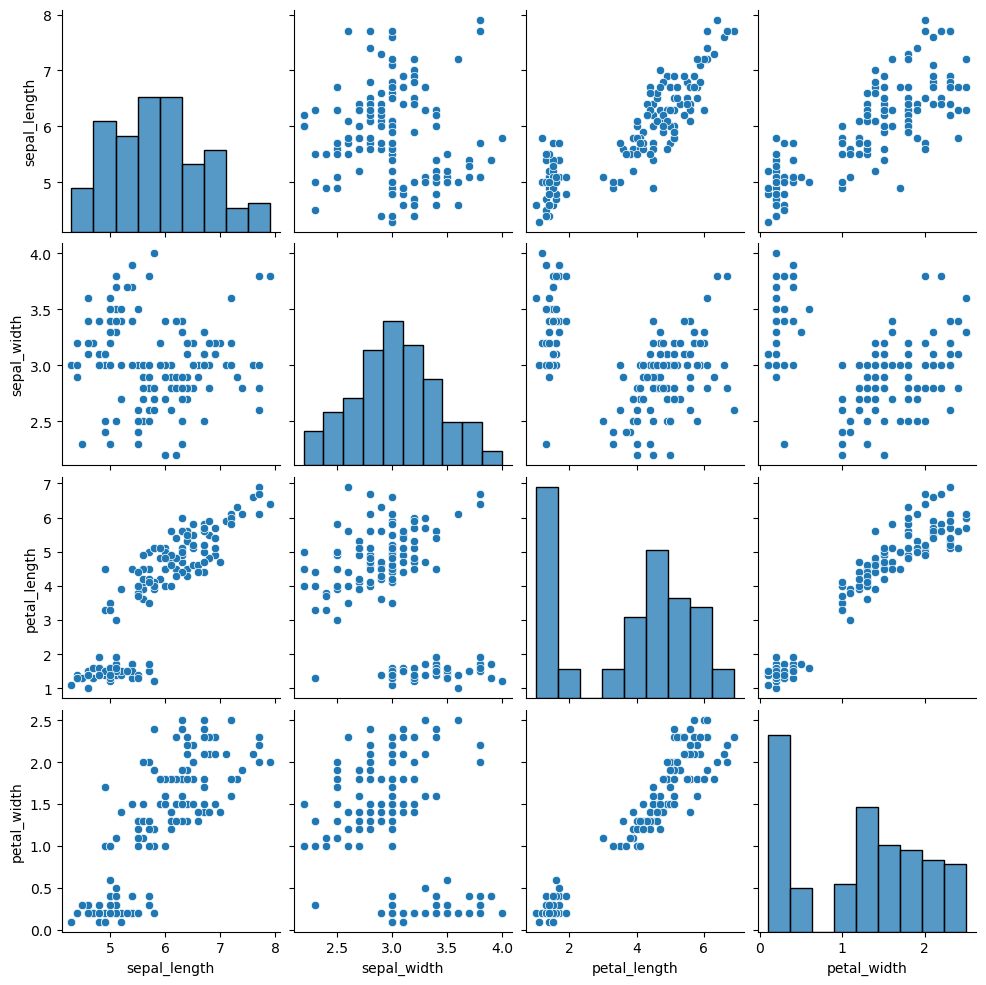

In [67]:
sns.pairplot(df);

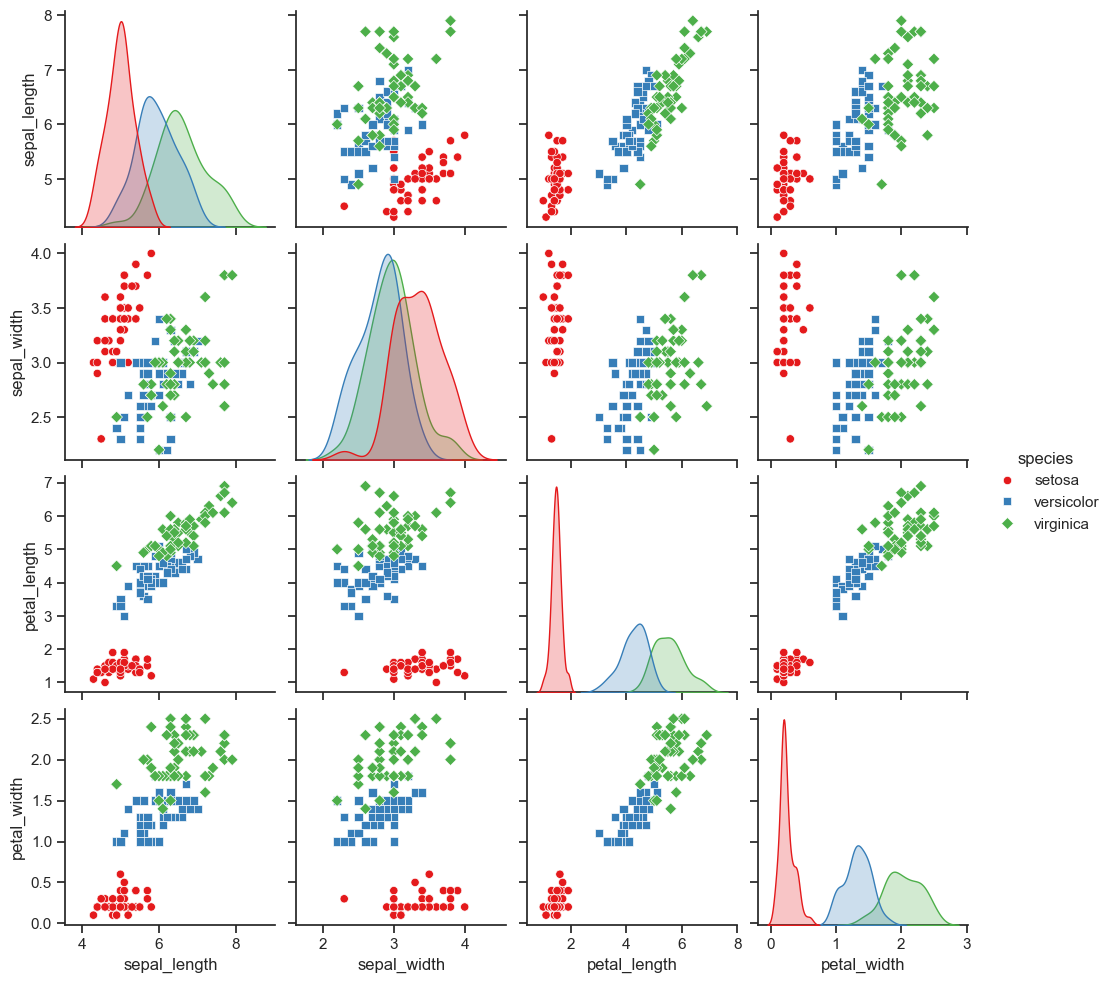

In [68]:
# Pairplot to visualize relationships between features
sns.set(style="ticks")
custom_palette = sns.color_palette("Set1")[:3]
sns.pairplot(df, hue='species', markers=['o', 's', 'D'], palette=custom_palette)
plt.show()

* The above pairplot shows pairwise relationships between numeric features, with different colors for each species. It helps us visualize how features relate to each other and how they separate the species. Notably, setosa can be easily separated(linearly separable),virnica and versicolor have some overlap(almost linearly separable). Setosa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths.

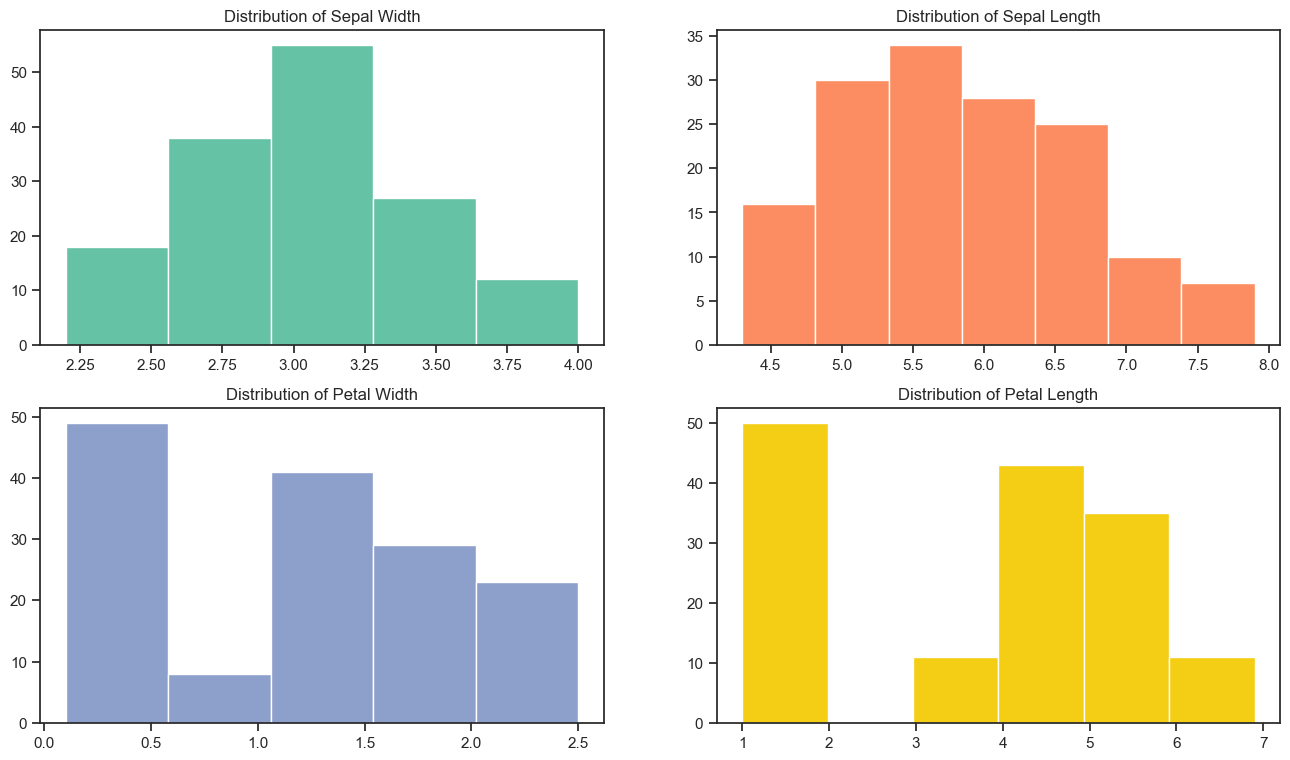

In [70]:
# Distribution of data for columns using histogram
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(df['sepal_width'], bins=5, color="#66c2a5");
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(df['sepal_length'], bins=7,color="#fc8d62");
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(df['petal_width'], bins=5,color="#8da0cb");
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(df['petal_length'], bins=6,color="#F4CE14");


* The Highest frequency of sepal width is between 3.0 to 3.5 which is around 70.
* The Highest frequency of sepal length is between 5.5 and 6.0 which is around 35.
* The Highest frequency of petal width is between 0 to 0.5 which is around 50.
* The Highest frequency of petal length is between 0 to 0.5 which is around 50.

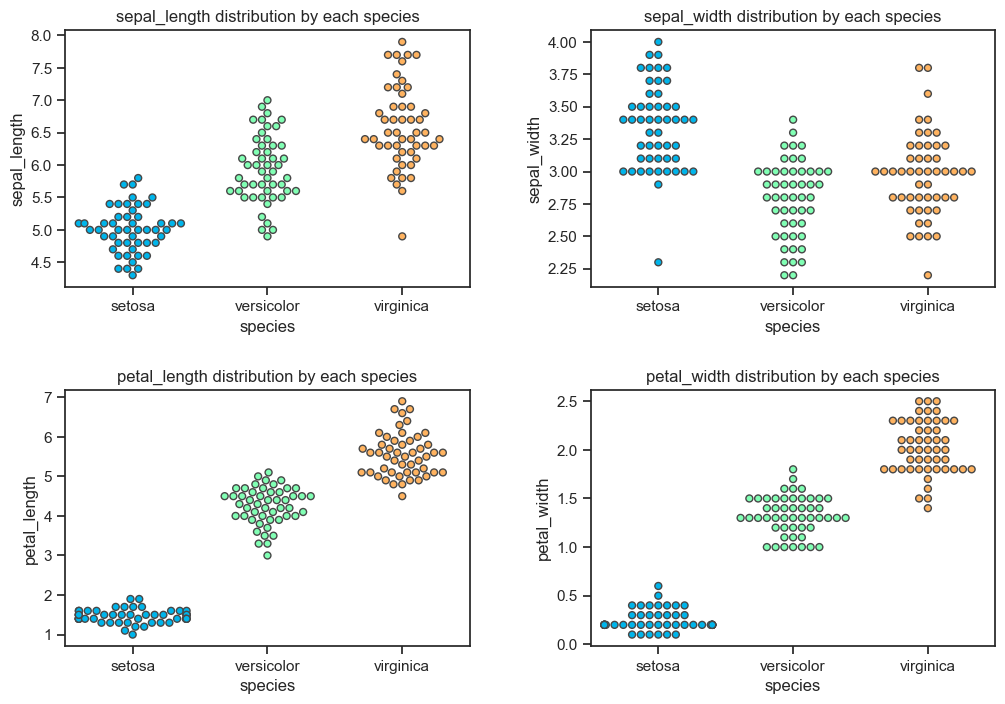

In [75]:
# Swarm plots for each attribute
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.swarmplot(x='species', y=column, data=df, linewidth=1, palette="rainbow")
    plt.title(f'{column} distribution by each species')
    
# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

* The plots above reveal clear distinctions among the iris species. Setosa has the smallest petals and a unique sepal width. Versicolor falls in the middle and Virginica has the largest petals.

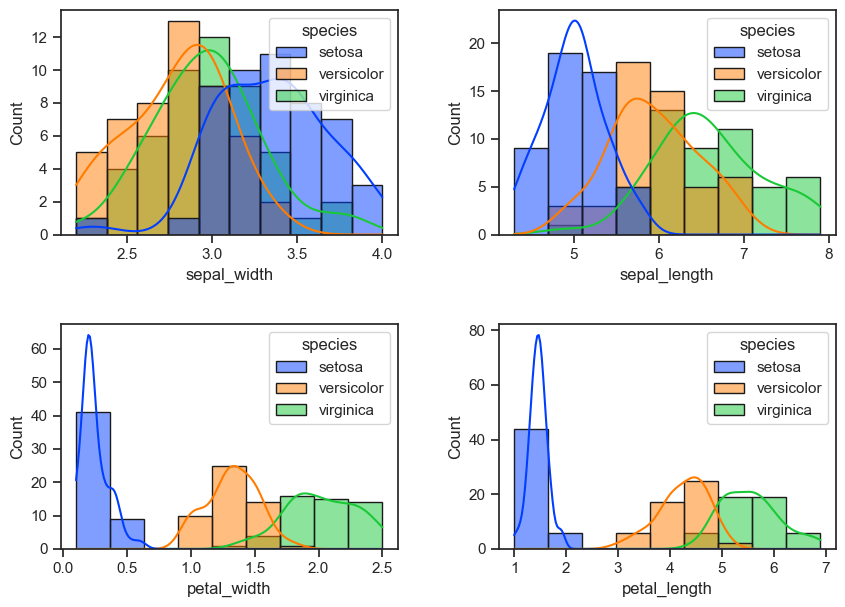

In [78]:
# Plot histogram with a kernel density estimator plot
fig, axes = plt.subplots(2, 2, figsize=(10,7))
sns.histplot(ax = axes[0,0],data=df,x ='sepal_width',hue='species',kde=True,palette="bright",edgecolor='k')
sns.histplot(ax = axes[0,1],data=df,x ='sepal_length',hue='species',kde=True,palette="bright",edgecolor='k')
sns.histplot(ax = axes[1,0],data=df,x ='petal_width',hue='species',kde=True,palette="bright",edgecolor='k')
sns.histplot(ax = axes[1,1],data=df,x ='petal_length',hue='species',kde=True,palette="bright",edgecolor='k')
# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.4)

* In the case of Sepal Length, there is a huge amount of overlapping.
* In the case of Sepal Width also, there is a huge amount of overlapping.
* In the case of Petal Length, there is a very little amount of overlapping.
* In the case of Petal Width also, there is a very little amount of overlapping.

  So we can use Petal Length and Petal Width as the classification feature.

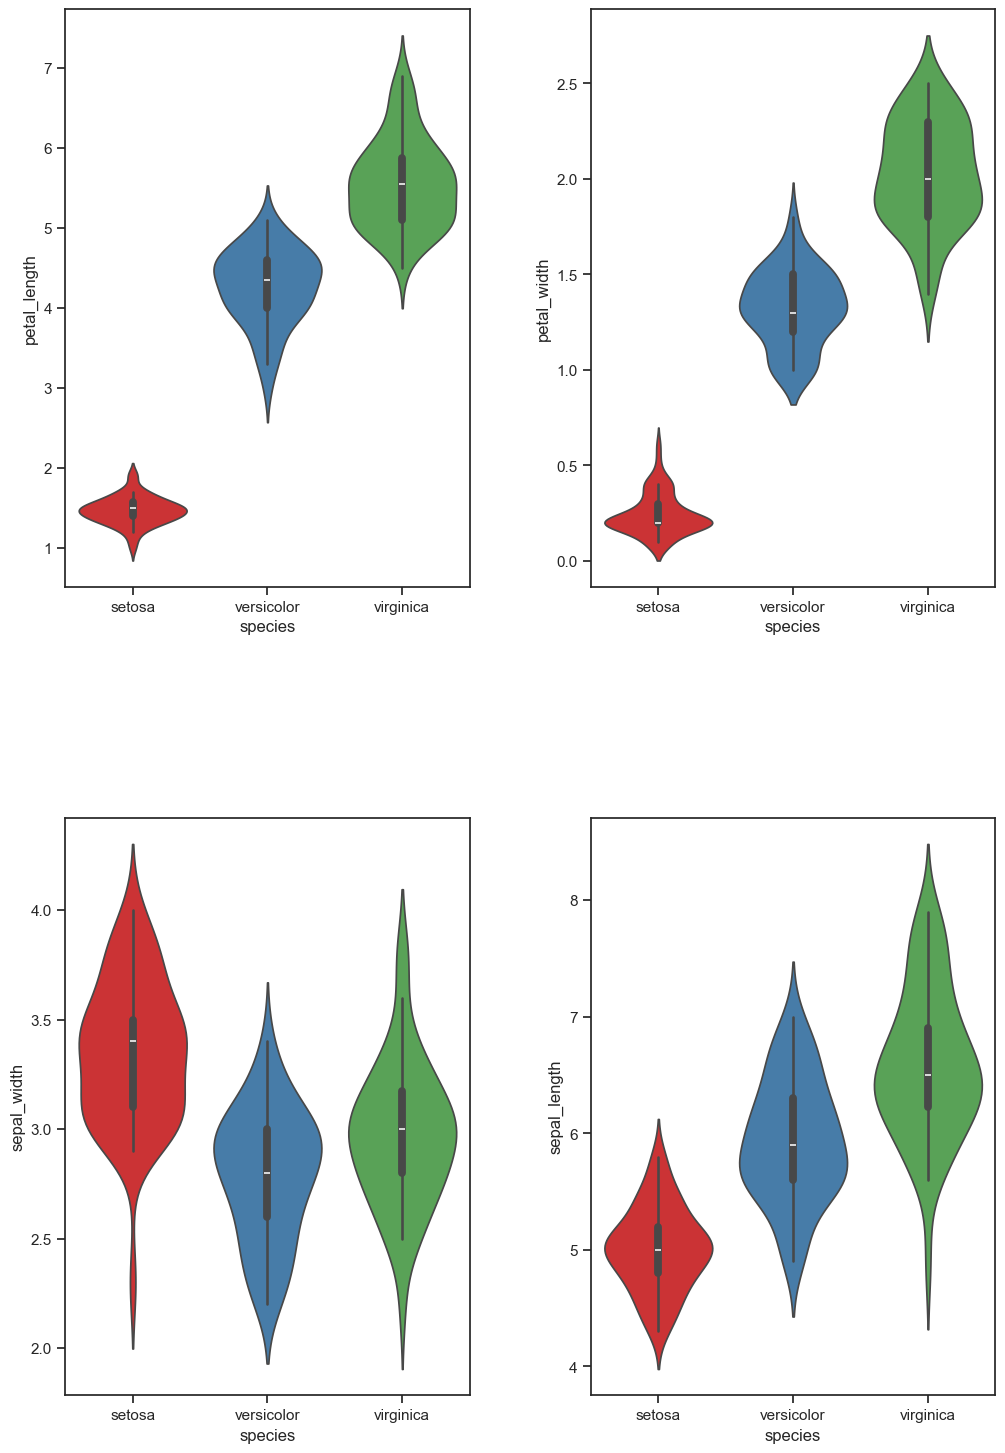

In [81]:
# Violin plot to visualize distribution and density by species
plt.figure(figsize=(12,18))
plt.subplot(2, 2, 1)
sns.violinplot(x="species", y="petal_length", data=df, palette="Set1")
plt.subplot(2, 2, 2)
sns.violinplot(x="species", y="petal_width", data=df, palette="Set1")
plt.subplot(2, 2, 3)
sns.violinplot(x="species", y="sepal_width", data=df, palette="Set1")
plt.subplot(2, 2, 4)
sns.violinplot(x="species", y="sepal_length", data=df, palette="Set1")
    
# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

* From the above violin plots, we can clearly see that petal length and petal width are most useful feature to separate the various flower types. We can see clear separation between the Iris-setosa species and the other two species, making it a good feature for classification. For setosa, length and width of petal is significantly less as compared to other two violin plots. The petal width and length of virginica is maximum as compared to other two species. The sepal width of setosa covers a wide range but the length is small as compared to other two species.

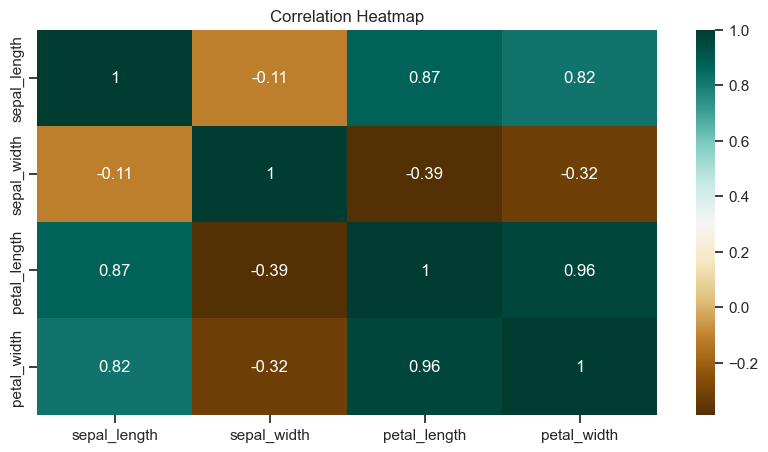

In [84]:
# Visualise the correlation using a heatmap
plt.figure(figsize=(10, 5))
correlation_matrix = df.corr(numeric_only = True)
ax = sns.heatmap(correlation_matrix,annot=True,cmap="BrBG");
ax.set_title("Correlation Heatmap")
plt.show()

* The correlation heatmap shows the pairwise correlation coefficients between numeric features. It helps us understand how features are related to each other. In this case, we can see strong positive correlations between petal length and petal width, as well as between sepal length and petal length. Also, Petal width and sepal length have good correlation.

# Feature Engineering
* Assigning numerical values to the classes: "setosa":0,"versicolor":1,"virginica":2

In [88]:
#Encoding on target variable
df["species"]=df["species"].replace({"setosa":0,"versicolor":1,"virginica":2})
# Define X and y
X = df.drop(['species'], axis=1)
y = df['species']

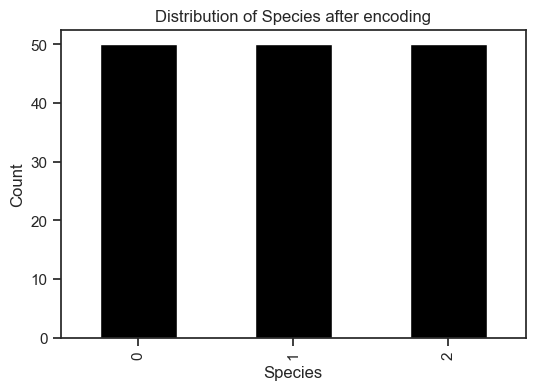

In [90]:
#plot the encoded data
Species_encoded = y.value_counts()
plt.figure(figsize=(6, 4))
Species_encoded.plot(kind='bar',color='Black')
plt.title('Distribution of Species after encoding')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

* We have a balanced dataset! This proves that species are well balanced. Hence this will be useful for valuable insights while predicting the model.

# Train_test split

In [94]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Print shapes of X_train, y_train, X_test, y_test
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


# Model training and model evaluation

In [97]:
#Create a function a evaluate performance metrics
def Evaluate_Performance(model, Xtrain, Xtest, ytrain, ytest) : 
    model.fit(Xtrain,ytrain)
    overall_score = cross_val_score(model, Xtrain,ytrain, cv=10)
    model_score = np.average(overall_score)
    ypredicted = model.predict(Xtest)
    avg = 'weighted'
    print("\n • Training Accuracy Score : ", round(model.score(Xtrain, ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(f" • Testing Accuracy Score :{round(accuracy_score(ytest, ypredicted) * 100,2)}")
    print(f" • Precision Score is : {np.round(precision_score(ytest, ypredicted , average=avg) * 100,2)}")
    print(f" • Recall Score is : {np.round(recall_score(ytest, ypredicted , average=avg) * 100,2)}")
    print(f" • F1-Score Score is : {np.round(f1_score(ytest, ypredicted , average=avg) * 100,2)}")

# 1. Logistic Regression Model

In [100]:
#Building Logistic Regression model and evaluating the model's performance metrics
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train.ravel())
Logistic_pred = logistic_model.predict(X_test)
print("Logistic Regression: ")
Evaluate_Performance(logistic_model, X_train, X_test, y_train, y_test)

Logistic Regression: 

 • Training Accuracy Score :  97.32
 • Cross Validation Score : 96.52
 • Testing Accuracy Score :97.37
 • Precision Score is : 97.53
 • Recall Score is : 97.37
 • F1-Score Score is : 97.34


Text(47.25, 0.5, 'Actual outputs')

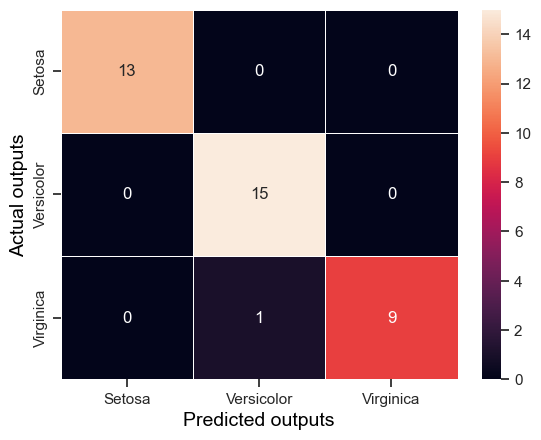

In [102]:
# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, Logistic_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['species']), index = np.unique(df['species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

# 2. K-Nearest Neighbors Model

In [105]:
KNN = KNeighborsClassifier()
parameters = {"n_neighbors" : range(1,50)}
grid_kn = GridSearchCV(estimator = KNN , param_grid = parameters , scoring = "accuracy" , cv = 5 , verbose = 1 , n_jobs = -1)

grid_kn.fit(X_train , y_train.ravel())
grid_kn.best_params_

Fitting 5 folds for each of 49 candidates, totalling 245 fits


{'n_neighbors': 6}

In [107]:
K = 3
KNN_model = KNeighborsClassifier(K)
KNN_model.fit(X_train , y_train.ravel())
KNN_pred = KNN_model.predict(X_test)
print("K-Nearest Neighbors: ")
Evaluate_Performance(KNN_model, X_train, X_test, y_train, y_test)

K-Nearest Neighbors: 

 • Training Accuracy Score :  96.43
 • Cross Validation Score : 95.61
 • Testing Accuracy Score :94.74
 • Precision Score is : 95.36
 • Recall Score is : 94.74
 • F1-Score Score is : 94.61


Text(47.25, 0.5, 'Actual outputs')

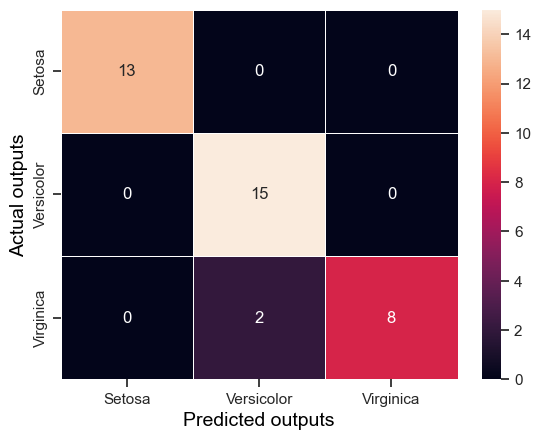

In [109]:
# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, KNN_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['species']), index = np.unique(df['species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

# 3. Gaussian Naive Bayes Model

In [112]:
GNB_model = GaussianNB()
GNB_model.fit(X_train , y_train.ravel())
GNB_pred = GNB_model.predict(X_test)
print("Gaussian Naive Bayes: ")
Evaluate_Performance(GNB_model, X_train, X_test, y_train, y_test)

Gaussian Naive Bayes: 

 • Training Accuracy Score :  96.43
 • Cross Validation Score : 96.52
 • Testing Accuracy Score :94.74
 • Precision Score is : 95.36
 • Recall Score is : 94.74
 • F1-Score Score is : 94.61


Text(47.25, 0.5, 'Actual outputs')

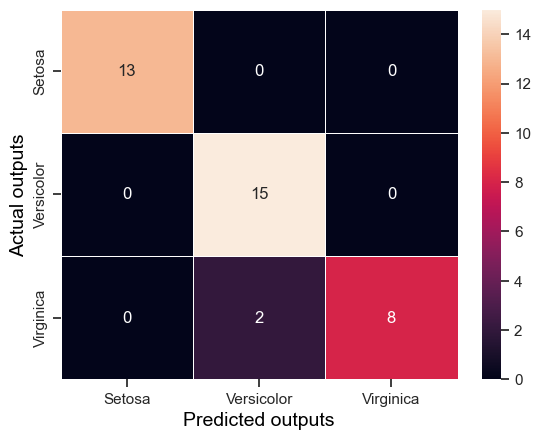

In [114]:
# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, GNB_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['species']), index = np.unique(df['species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

# 4. Support Vector Machine Model

In [117]:
SVM_model = SVC()
SVM_model.fit(X_train , y_train)
SVM_pred = SVM_model.predict(X_test)
print("Support Vector Machine: ")
Evaluate_Performance(SVM_model, X_train, X_test, y_train, y_test)

Support Vector Machine: 

 • Training Accuracy Score :  97.32
 • Cross Validation Score : 97.42
 • Testing Accuracy Score :97.37
 • Precision Score is : 97.53
 • Recall Score is : 97.37
 • F1-Score Score is : 97.34


Text(47.25, 0.5, 'Actual outputs')

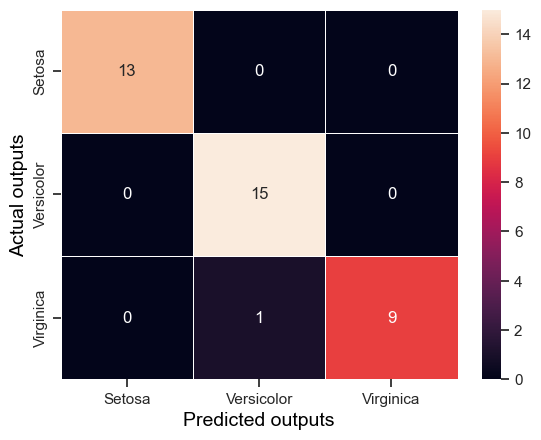

In [119]:
# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, SVM_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['species']), index = np.unique(df['species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

# 5. Decision Tree Model

In [122]:
DTree_model = DecisionTreeClassifier(max_depth = 3)
DTree_model.fit(X_train , y_train)
DTree_pred = DTree_model.predict(X_test)
print("Decision Tree: ")
Evaluate_Performance(DTree_model, X_train, X_test, y_train, y_test)

Decision Tree: 

 • Training Accuracy Score :  98.21
 • Cross Validation Score : 95.61
 • Testing Accuracy Score :92.11
 • Precision Score is : 93.42
 • Recall Score is : 92.11
 • F1-Score Score is : 91.77


Text(47.25, 0.5, 'Actual outputs')

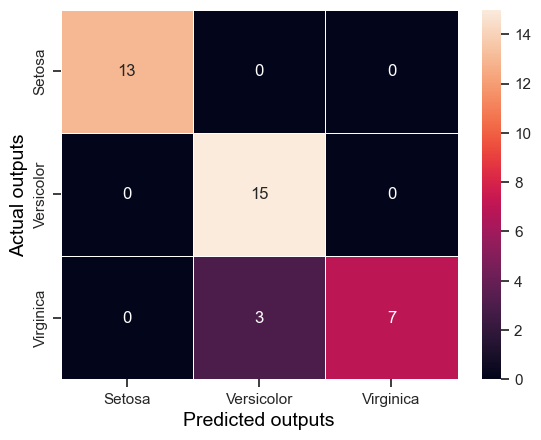

In [124]:
# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, DTree_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['species']), index = np.unique(df['species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

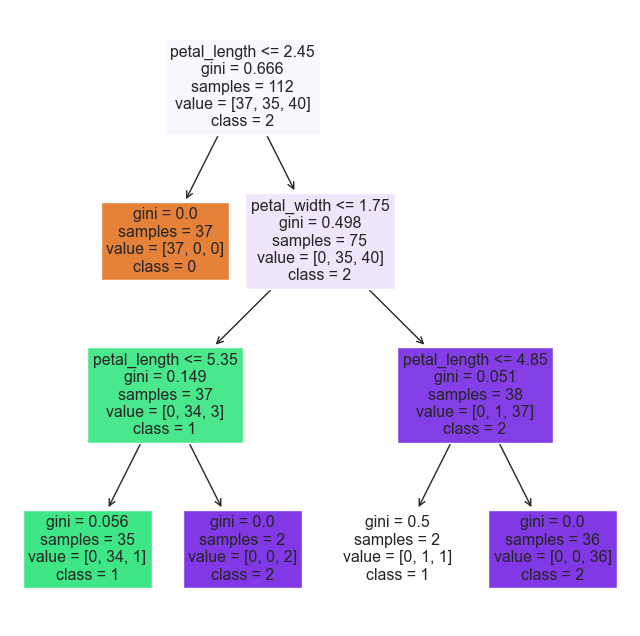

In [126]:
#white box one
F = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (8 , 8))
plot = tree.plot_tree (DTree_model , feature_names = F , class_names = T , filled = True)

# 6. Random Forest Model

In [129]:
RF_model = RandomForestClassifier(n_estimators = 400, max_depth = 3)
RF_model.fit(X_train , y_train)
RF_pred = RF_model.predict(X_test)
print("Random Forest: ")
Evaluate_Performance(RF_model, X_train, X_test, y_train, y_test)

Random Forest: 

 • Training Accuracy Score :  97.32
 • Cross Validation Score : 95.61
 • Testing Accuracy Score :94.74
 • Precision Score is : 95.36
 • Recall Score is : 94.74
 • F1-Score Score is : 94.61


Text(47.25, 0.5, 'Actual outputs')

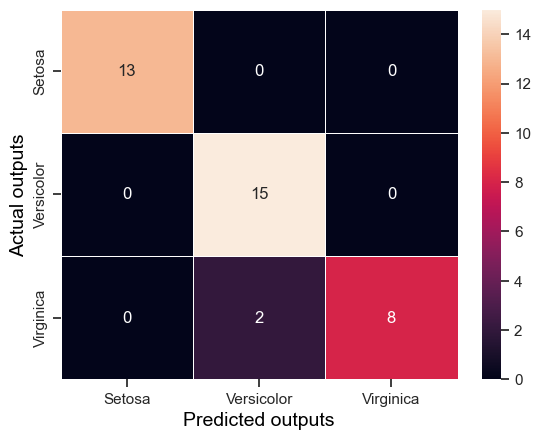

In [130]:
# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, RF_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['species']), index = np.unique(df['species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

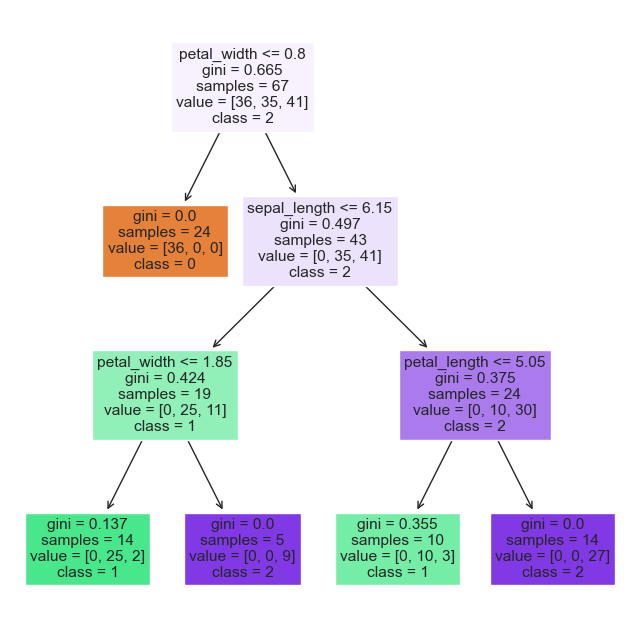

In [131]:
#white box one
F = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (8 , 8))
plot = tree.plot_tree (RF_model.estimators_[5] , feature_names = F , class_names = T , filled = True)

# Create Dataframe of all models performance metrics

In [136]:
models = pd.DataFrame ({
    'Model' : ['Logistic Regression', ' K-Nearest Neighbors Model', 'Gaussian Naive Bayes', 'Support Vector Machine', 
               'Decision Tree', 'Random Forest'] ,
    'Precision' : [precision_score(y_test, Logistic_pred, average='weighted') , precision_score(y_test, KNN_pred, average='weighted'),
                   precision_score(y_test, GNB_pred, average='weighted') , precision_score(y_test, SVM_pred, average='weighted'), 
                   precision_score(y_test, DTree_pred, average='weighted') , precision_score(y_test, RF_pred, average='weighted')],
    'Recall' : [recall_score(y_test, Logistic_pred, average='weighted') , recall_score(y_test, KNN_pred, average='weighted'), 
                recall_score(y_test, GNB_pred, average='weighted') , recall_score(y_test, SVM_pred, average='weighted'),
                recall_score(y_test, DTree_pred, average='weighted') , recall_score(y_test, RF_pred, average='weighted')],
    'F1-score' : [f1_score(y_test, Logistic_pred, average='weighted') , f1_score(y_test, KNN_pred, average='weighted'),
                  f1_score(y_test, GNB_pred, average='weighted') , f1_score(y_test, SVM_pred, average='weighted'), 
                  f1_score(y_test, DTree_pred, average='weighted') , f1_score(y_test, RF_pred, average='weighted')],
    'Accuracy' : [accuracy_score(y_test, Logistic_pred) , accuracy_score(y_test, KNN_pred) , accuracy_score(y_test, GNB_pred),
                  accuracy_score(y_test, SVM_pred) , accuracy_score(y_test, DTree_pred) , accuracy_score(y_test, RF_pred)]})

models = models.sort_values(by='Accuracy', ascending=False)    
print(tabulate(models, headers='keys', tablefmt='github',showindex=False))

| Model                     |   Precision |   Recall |   F1-score |   Accuracy |
|---------------------------|-------------|----------|------------|------------|
| Logistic Regression       |    0.975329 | 0.973684 |   0.973416 |   0.973684 |
| Support Vector Machine    |    0.975329 | 0.973684 |   0.973416 |   0.973684 |
| K-Nearest Neighbors Model |    0.95356  | 0.947368 |   0.946089 |   0.947368 |
| Gaussian Naive Bayes      |    0.95356  | 0.947368 |   0.946089 |   0.947368 |
| Random Forest             |    0.95356  | 0.947368 |   0.946089 |   0.947368 |
| Decision Tree             |    0.934211 | 0.921053 |   0.917675 |   0.921053 |


# Bar plot of all Models Accuracy Comparision

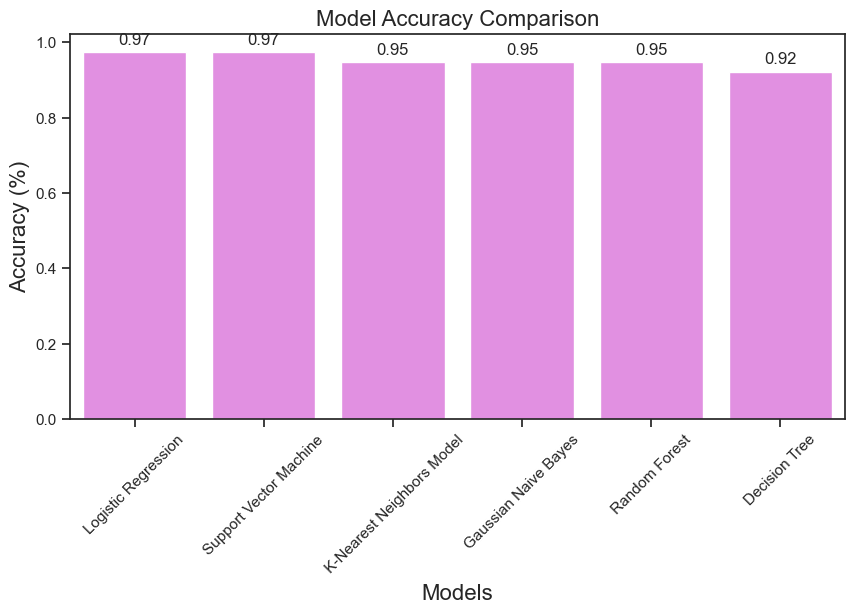

In [139]:
plt.figure(figsize=(10, 5))
plot=sns.barplot(x='Model',y='Accuracy',data=models,color='violet')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Model Accuracy Comparison",fontsize=16)
plt.xlabel("Models",fontsize=16)
plt.ylabel("Accuracy (%)",fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Model Testing: The Inference Pipeline

In [142]:
# Checking a sample of predictor value of measurements from the the model which is trained
X.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [144]:
# Checking the species according to above predictor variables
y.tail()

145    2
146    2
147    2
148    2
149    2
Name: species, dtype: int64

* Numerical values to the classes: "setosa":0,"versicolor":1,"virginica":2. We passed numerical values of these classes to our model, so our model will predict numerical values only.

In [147]:
# Generate unseen data accordingly with inputs
user_values=np.array([5.9,3.0,5.1,1.8]).reshape(1,-1)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
user_values_df = pd.DataFrame(user_values, columns=feature_names)

# Predict the species using KNN model 
predict = KNN_model.predict(user_values_df)

# Display the predicted species
print(f'The species is: {predict}')

The species is: [2]


* We took the sample data from X.head() and asked given the input and then generated unseen data accordingly with inputs. The original species was Iris-virginica and our trained model with KNN predicted [2] which means Iris-virginica on unseen data. Therefore, showing the robustness of model.

# Generating the output file with predicted results

In [151]:
#decoding the species 
df["species"]=df["species"].replace({0 : 'Iris-setosa', 1 : 'Iris-versicolor', 2 : 'Iris-virginica'})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [153]:
#storing the predicted results in a dataframe
pred_result = pd.DataFrame(KNN_model.predict(X))
pred_result = pred_result.rename(columns = {0 : "Predicted Species"})
pred_result

,Predicted Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [155]:
#decoding the species for predicted results
Species_decoded = {0 : 'Iris-setosa', 1 : 'Iris-versicolor', 2 : 'Iris-virginica'}
pred_result['predicted_species'] = pred_result['Predicted Species'].map(Species_decoded)
pred_result

,Predicted Species,predicted_species
0,0,Iris-setosa
1,0,Iris-setosa
2,0,Iris-setosa
3,0,Iris-setosa
4,0,Iris-setosa
...,...,...
145,2,Iris-virginica
146,2,Iris-virginica
147,2,Iris-virginica
148,2,Iris-virginica


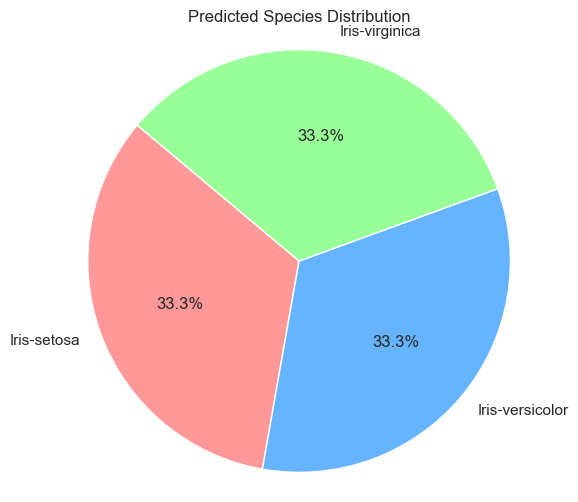

In [157]:
# Assuming pred_result is a pandas DataFrame with 'predicted_species' column
species_counts = pred_result['predicted_species'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Predicted Species Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [159]:
#Generating the output file with predicted species
final_model = pd.concat([df, pred_result['predicted_species']], axis = 1)
final_model

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_species
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica


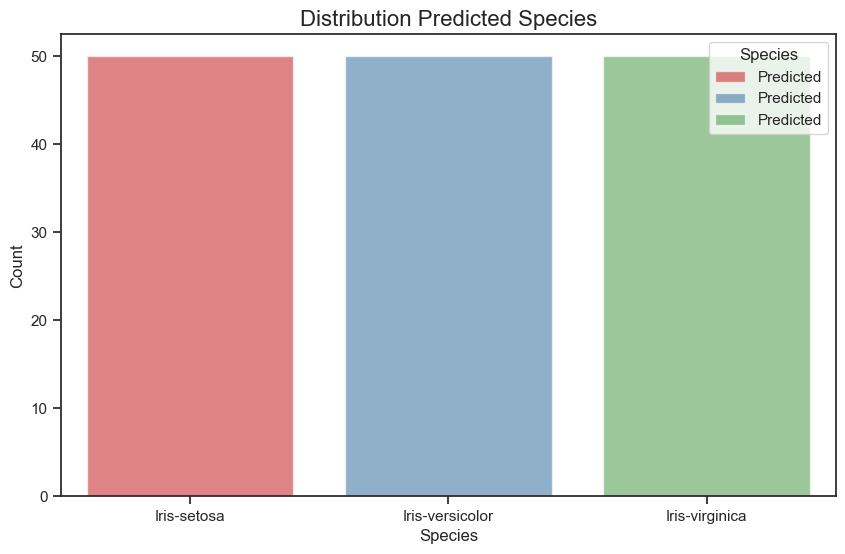

In [161]:
# Plotting the predicted species distribution
plt.figure(figsize=(10, 6))
# Predicted species (Predicted values)
sns.countplot(x='predicted_species', data=final_model, palette='Set1', label='Predicted', alpha=0.6)
# Adding labels and title
plt.title('Distribution Predicted Species', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Species', loc='upper right')
# Show plot
plt.show()

In [163]:
final_model.to_csv(r"IRIS.csv")

# Conclusion:

* The dataset is balanced i.e. equal records are present for all three species.
* We have four numerical columns while just one categorical column which in turn is our target column.
* We have performed Explorative Data Analysis on the Iris dataset and created various colorful visualizations, including boxplots, pairplots, histogram, histogram with a density plot, swarm Plots, violin plots, a correlation heatmap, and a pie chart for species distribution.
* These visualizations helped in understanding the relationships and differences between Iris species and features, making it easier to classify and analyze these flowers based on their measurements.
* The setosa species is the most easily distinguishable because of its small feature size. The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has average feature sizes and virginica has larger feature sizes.
* EDA with visualizations of the Iris dataset reveals that features like petal length and petal width are highly discriminative for distinguishing between the three Iris species. This information is crucial to build a machine learning model for Iris species classification.
* By employing machine learning algorithms such as Logistic Regression, K-Nearest Neighbors (KNN) classification, Gaussian Naive Bayes classification, Support Vector Machine, Decision Tree, and Random Forest, we successfully constructed models capable of precisely classifying Iris flowers into their respective species based on these measurements.
* Furthermore, the evaluation of machine learning models revealed that Support vector machine(SVM), outperformed other classification models, with an impressive accuracy of 97% on unseen data, highlighting the model's robustness.
* Our results highlight the effectiveness of machine learning techniques in automating species classification based on morphological attributes, contributing to the fields of botany, ecology, and beyond.